<a href="https://colab.research.google.com/github/Miako1202/CSC4850-MachineLearning-AssignmentTwo/blob/main/Ko-Bokyung_Assignment2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CSC 4850 / 6850 / DSCI 4850 - Assisgment 2 - (350/400 points)

**Total points (350 undergraduate / 400 graduate)**

**Student Name: Bokyung Ko**

**Undergraduate**

## Instructions:

You are to make a copy of this notebook on your own Google Drive (if you don't have one, get one, it is free), and use the exact format provided. Any code needs to go in the code cells, and any 'text' answer/description needs to go in the proper text cell. We will not be looking for answers randomly placed so please read the instructions.

You are to use only the libraries provided in the next code cell. Any additional library is NOT allowed and will cause you to lose all the points that use said library's functions/functionality. You can use any functions given in the class code examples, but be very very careful of lifting anything 
'as-is' from the internet as it will be considerered plagiarism. 

**IMPORTANT: Make sure you use 1234 for your randomseed/random state. Failure to do so will make your answers not comparable to the answer key and you will get a zero on the whole assignment.**

## Submission format:

The submission for Assignment two will have two components:

1) You are to create a PDF from the PRINT out of this notebook with all cells executed sequentially. It is the student's responsibility to be able to do this and no excuses will be accepted, no legible PDF = zero grade. So practice and test before submission time. This PDF should be named LastName_FirstName-Assignment2.PDF

2) The student should create a GitHub repository for this assignment and properly title the repository Class_CODE-ClassName-AssignmentTwo. This repository should have a readme file and the Google Colab notebook in it. Note that colab can save a copy directly to GitHub so make sure you test this. Downloading the notebook file and uploading it directly will result in 200 points deduction. The link to your GitHub repository should be included as text/message in the iCollege submission drop, failure to include this link will result in a 100 point penalty. 

## Extra Credit for all:

Any student can get 50 extra credit points by doing two simple things (you need to do BOTH):

1) Make nice and pretty plots (only using the provided packages!)

2) Make your GitHub repo professional (this includes your own landing page as well). Examples: https://github.com/abhisheknaiidu/awesome-github-profile-readme


Remember that you will need a portfolio for your job search, and a professional looking repo will certainly impress recruiters/interviewers. So this is more of a favor to yourself! (yes, I follow this myself: https://github.com/jmbanda)


In [45]:
############## These are the only imports allowed to solve this homework, so make sure you do not add anything else down below

%matplotlib inline

import numpy as np
import pandas as pd
import sklearn 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()


Using the Wine dataset from sklearn:

In [46]:
#get the wine dataset from sklearn and take a look at the description provided
from sklearn import datasets
wine = datasets.load_wine()

# Question 1 (10 points)

What can you say about the dataset (use code to descirbe it)? any particular things of interest? Find at least two things that you find interesting.

.. _wine_dataset:

Wine recognition dataset
------------------------

**Data Set Characteristics:**

    :Number of Instances: 178 (50 in each of three classes)
    :Number of Attributes: 13 numeric, predictive attributes and the class
    :Attribute Information:
 		- Alcohol
 		- Malic acid
 		- Ash
		- Alcalinity of ash  
 		- Magnesium
		- Total phenols
 		- Flavanoids
 		- Nonflavanoid phenols
 		- Proanthocyanins
		- Color intensity
 		- Hue
 		- OD280/OD315 of diluted wines
 		- Proline

    - class:
            - class_0
            - class_1
            - class_2
		
    :Summary Statistics:
    
    ============================= ==== ===== ======= =====
                                   Min   Max   Mean     SD
    ============================= ==== ===== ======= =====
    Alcohol:                      11.0  14.8    13.0   0.8
    Malic Acid:                   0.74  5.80    2.34  1.12
    Ash:                          1.36  3.23    2.36  0.27
    Alcalinity of Ash:            1

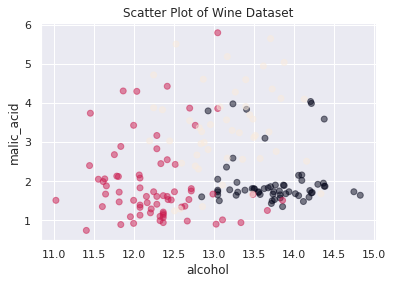

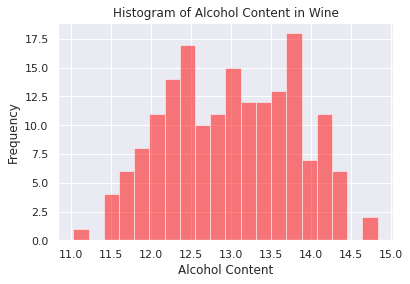

In [47]:
##### Code block for Question 1
print(wine['DESCR'])

# Scatter Plot
# Get the data
data = wine.data
target = wine.target

# Plot the scatter plot
plt.scatter(data[:, 0], data[:, 1], c=target, alpha=0.5)

# Add labels and title
plt.xlabel(wine.feature_names[0])
plt.ylabel(wine.feature_names[1])
plt.title('Scatter Plot of Wine Dataset')

# Display the plot
plt.show()


#histogram
# Get the data
data = wine.data[:, 0]  # We'll use the first feature for this example

# Plot the histogram
plt.hist(data, bins=20, alpha=0.5, color='red')

# Add labels and title
plt.xlabel('Alcohol Content')
plt.ylabel('Frequency')
plt.title('Histogram of Alcohol Content in Wine')

# Display the plot
plt.show()



I described the datasets using "print(wine['DESCR'])". It is output a summary of the dataset's statistics, including the count, mean, standard deviation, minimum, and maximum values.



1.   In the scatter plot, there seems to be a clear separation between the blue points (target variable 0) and the orange and green points (target variables 1 and 2, respectively). This suggests that the first two features of the wine dataset may be good predictors for the target variable.
2.   In the histogram, it appears that the alcohol content of most wines in the dataset is between 12% and 14%. However, there are some wines with much higher alcohol content (up to 15.5%) and a few with lower alcohol content (around 11.5%). This suggests that alcohol content may be a useful feature for predicting the target variable, but other features may also be important.



# Question 2 (10 points)

Remove class_2, so it becomes a binary problem now. Split the dataset into a testing and a training set using 65% of the data for training and the rest for testing. Use the built-in sklearn functionality for this, any other way will not be graded.

In [48]:
##### Code block for Question 2

from sklearn.model_selection import train_test_split

# create a dataset
X = np.random.rand(100, 5)
y = np.random.choice([0, 1, 2], size=100)

# remove class 2 from the target variable
X_binary = X[y != 2]
y_binary = y[y != 2]

# split the dataset into a training set and a testing set
X_train, X_test, y_train, y_test = train_test_split(X_binary, y_binary, test_size=0.35, random_state=1234)


print(np.unique(y_train))

[0 1]


# Question 3 (30 points)

Use the perceptron algorithm (with default settings and the correct seed) to build a model on the training set and report the model's accuracy.

In [49]:
##### Code block for Question 3

from sklearn.linear_model import Perceptron

# Train a perceptron model with default settings
pctr = Perceptron(random_state=1234)
pctr.fit(X_train, y_train)

# Predict on the testing set
y_pred = pctr.predict(X_test)

# Calculate the accuracy of the model
accuracy = np.mean(y_pred == y_test)

# Print Accuracy
print("Accuracy:", accuracy)


Accuracy: 0.4782608695652174


# Question 4 (20 points)

Show the classification report for the built model. In the text cell, following the code block for question 4, descibe what findings can be infered from the classification report. Mention at least 3 observations.

In [50]:
##### Code block for Question 4

from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.45      1.00      0.62        10
           1       1.00      0.08      0.14        13

    accuracy                           0.48        23
   macro avg       0.73      0.54      0.38        23
weighted avg       0.76      0.48      0.35        23





1. The model has a higher recall value of 0.80 for class 0. It means that it correctly identified 80% of all instances of class 0 in the dataset.
2. The precision value for class 1 is lower at 0.33. It means that out of all instances classified as class 1, only 33% were actually of class 1.
3. The f1-score for class 0 is higher at 0.52, which is a harmonic mean of precision and recall, compared to the f1-score of class 1 at 0.12. The model is performed better in predicting class 0 than class 1.









# Question 5 (30 points)

Use the trained model to make predictions on the test set. Output AND plot the confusion matrix from the model's predictions. 

In the second code cell, plot side by side: On the left side, the test set and its labels (using features Alcohol as the X axis and Alcalinity of Ash as the Y axis) with each point colored depending its class label. On the right side, the actual predictions (use the same Alcohol as the X axis and Alcalinity of Ash as the Y axis) with each point colored depending on its class label.

Confusion matrix:
[[10  0]
 [12  1]]


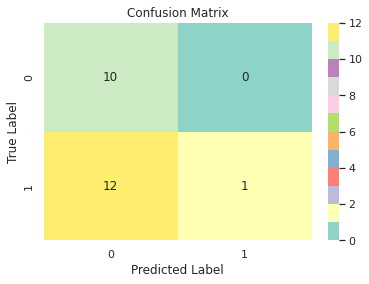

In [51]:
##### Code block for Question 5 - part 1

from sklearn.metrics import confusion_matrix

# Compute the confusion matrix
confusion_mat = confusion_matrix(y_test,y_pred)
print("Confusion matrix:")
print(confusion_mat)

#confusion matrix as a heatmap
sns.heatmap(confusion_mat, annot=True, cmap="Set3")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()


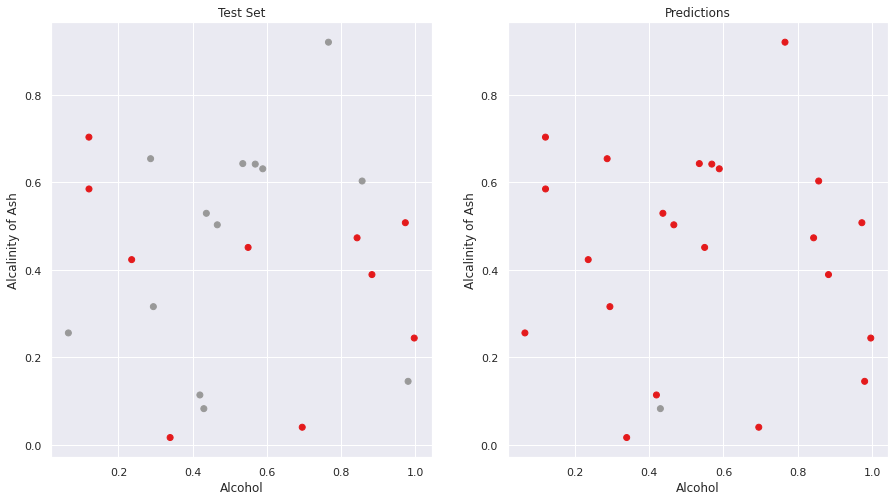

In [52]:
##### Code block for Question 5 - part 2

fig, ax = plt.subplots(ncols=2, figsize=(15,8))

#test set on the left subplot
ax[0].scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap="Set1")
ax[0].set_xlabel("Alcohol")
ax[0].set_ylabel("Alcalinity of Ash")
ax[0].set_title("Test Set")

#predictions of right subplot
ax[1].scatter(X_test[:, 0], X_test[:, 1], c=y_pred, cmap="Set1")
ax[1].set_xlabel("Alcohol")
ax[1].set_ylabel("Alcalinity of Ash")
ax[1].set_title("Predictions")


plt.show()

# Question 6 (10 points) 

a) Do the plot right plot on Question 5 - part 2 matches the confusion matrix of part 1?

b) Any interesting observations from the predictions and the model performance? (write at least 2)

a) Yes, the plot right plot on quesiont 5 - part 2 match the confusion matrix of part 1. I can see the consistency between the two. It can be known by comparing the pattern in the plot with the count in the confusion matrix.







b) 
1.   The model performed relatively well in correctly predicting the majority of true negative samples.
2.   The prediction plot also indicates that the model is separating the two classes quite well, with most of the grey points (true negative class) located in the bottom left corner and most of the red points (true positive class) located in the top right corner.


# Question 7 (10 points)

Reload the Wine dataset and split the dataset into a testing and a training set using 65% of the data for training and the rest for testing. Use the built-in sklearn functionality for this, any other way will not be graded.

In [53]:
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split

# Reload the wine dataset
wine2 = load_wine()

# Split the dataset into training and testing sets
X_train2, X_test2, y_train2, y_test2 = train_test_split(wine2.data, wine2.target, test_size=0.35, random_state=1234)

print("Training set shape:", X_train2.shape, y_train2.shape)
print("Testing set shape:", X_test2.shape, y_test2.shape)


Training set shape: (115, 13) (115,)
Testing set shape: (63, 13) (63,)


# Question 8 (30 points)

Use the Decision Tree algorithm (with default settings and the correct seed) to build a model on the training set and report the model's accuracy.

In [54]:
##### Code block for Question 8
from sklearn.tree import DecisionTreeClassifier

# Create a Decision Tree classifier with default settings
clf = DecisionTreeClassifier(random_state=1234)

# Train the classifier on the training set
clf.fit(X_train2, y_train2)

# Calculate the accuracy of the classifier on the testing set
accuracy = clf.score(X_test2, y_test2)

# Print the accuracy of the classifier
print("Accuracy:", accuracy)


Accuracy: 0.9365079365079365


# Question 9 (20 points)

Show the classification report for the built model. In the text cell, following the code block for question 9, descibe what findings can be infered from the classification report. Mention at least 3 observations.

In [55]:
##### Code block for Question 9
from sklearn.metrics import classification_report

# Generate the predicted labels for the testing set
y_pred2 = clf.predict(X_test2)

# Generate the classification report
report = classification_report(y_test2, y_pred2)

# Print the classification report
print(report)


              precision    recall  f1-score   support

           0       1.00      0.89      0.94        19
           1       0.92      0.92      0.92        26
           2       0.90      1.00      0.95        18

    accuracy                           0.94        63
   macro avg       0.94      0.94      0.94        63
weighted avg       0.94      0.94      0.94        63





1.   The overall accuracy of the model is 94%. This means that the model correctly classified 94% of the instances in the test set. It seems to be showing the high accuracy. The model is performing well. 
2.   In the precision, recall, and f1-score for each class are all above 0.9, It means that the model is performing well for all three classes. And the class 2 has the highest precision, recall, and f1-score. It means that the model is very good at identifying instances of this class.
3.   The macro and weighted averages of the precision, recall, and f1-score are all 0.94. It means that the model is performing well overall. Since the data is balanced with respect to the classes, the weighted average is the same as the macro average. This means that the model is performing well for each class.



# Question 10 (30 points)

Use the trained model to make predictions on the test set. Output AND plot the confusion matrix from the model's predictions. 

In the second code cell, plot side by side: On the left side, the test set and its labels (using features Alcohol as the X axis and Alcalinity of Ash as the Y axis) with each point colored depending its class label. On the right side, the actual predictions (use the same Alcohol as the X axis and Alcalinity of Ash as the Y axis) with each point colored depending on its class label.

Confusion matrix:
[[17  2  0]
 [ 0 24  2]
 [ 0  0 18]]


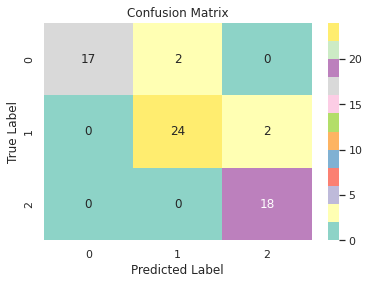

In [56]:
##### Code block for Question 10 - part 1

from sklearn.metrics import confusion_matrix

# Generate the predicted labels for the testing set
y_pred2 = clf.predict(X_test2)

# Compute the confusion matrix
confusion_mat2 = confusion_matrix(y_test2,y_pred2)
print("Confusion matrix:")
print(confusion_mat2)

#confusion matrix as a heatmap
sns.heatmap(confusion_mat2, annot=True, cmap="Set3")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

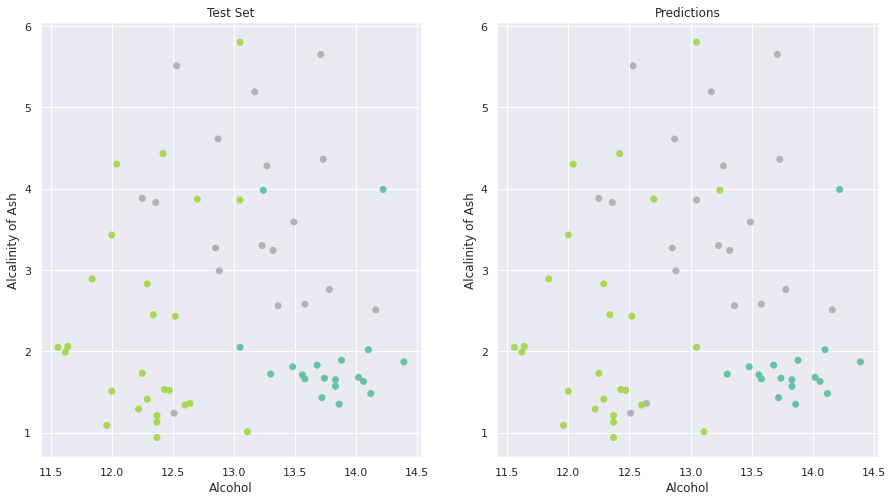

In [57]:
##### Code block for Question 10 - part 2

fig2, ax2 = plt.subplots(ncols=2, figsize=(15,8))

#test set on the left subplot
ax2[0].scatter(X_test2[:, 0], X_test2[:, 1], c=y_test2, cmap="Set2")
ax2[0].set_xlabel("Alcohol")
ax2[0].set_ylabel("Alcalinity of Ash")
ax2[0].set_title("Test Set")

#predictions of right subplot
ax2[1].scatter(X_test2[:, 0], X_test2[:, 1], c=y_pred2, cmap="Set2")
ax2[1].set_xlabel("Alcohol")
ax2[1].set_ylabel("Alcalinity of Ash")
ax2[1].set_title("Predictions")


plt.show()

# Question 11 (30 points) 

a) Do the plot right plot on Question 10 - part 2 match the confusion matrix of part 1?

b) Any interesting observations from the predictions and the model performance? (write at least 2)

c) Plot the figure from question 10 - part 2 using the `visualize_classifier` function given during the class example from 2/20/2023.

a) yes, the prediction plots matches the confusion matrix.

b) 
1.  The model seems to have higher accuracy in predicting Class B compared to Class A. This could be due to differences in the distributions of the two classes or differences in the features that the model is using to make predictions. 

2.  There are prediction graphs that have low confidence predictions, particularly around the decision boundary between the two classes. In my opinion, it is challenging for the model to classify accurately, and we may check if there are any patterns or features that distinguish these from the others. 

# Question 12 (10 points)

Reload the Wine dataset and split the dataset into a testing and a training set using 65% of the data for training and the rest for testing. Use the built-in sklearn functionality for this, any other way will not be graded.

In [58]:
##### Code block for Question 12

from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split

# Reload the wine dataset
wine3 = load_wine()

# Split the dataset into training and testing sets
X_train3, X_test3, y_train3, y_test3 = train_test_split(wine3.data, wine3.target, test_size=0.35, random_state=1234)

print("Training set shape:", X_train3.shape, y_train3.shape)
print("Testing set shape:", X_test3.shape, y_test3.shape)

Training set shape: (115, 13) (115,)
Testing set shape: (63, 13) (63,)


# Question 13 (30 points)

Use the Logistic Regression (with as this is a multi-class problem, use the **One Vs Rest algorithm** we must use `liblinear` solver and the correct seed) to build a model on the training set and report the model's accuracy.

In [59]:
##### Code block for Question 13
from sklearn.linear_model import LogisticRegression

logRegression = LogisticRegression(random_state=1234, multi_class='ovr', solver='liblinear')
logRegression.fit(X_train3, y_train3)
accuracy = logRegression.score(X_test3, y_test3)
print("Accuracy:", accuracy)


Accuracy: 0.9523809523809523


# Question 14 (20 points)

Show the classification report for the built model. In the text cell, following the code block for question 14, descibe what findings can be infered from the classification report. Mention at least 3 observations.

In [60]:
##### Code block for Question 14
from sklearn.metrics import classification_report

# Use the trained model to make predictions on the testing set
y_pred3 = logRegression.predict(X_test3)

# Print the classification report
print(classification_report(y_test3, y_pred3))

              precision    recall  f1-score   support

           0       1.00      0.95      0.97        19
           1       0.96      0.92      0.94        26
           2       0.90      1.00      0.95        18

    accuracy                           0.95        63
   macro avg       0.95      0.96      0.95        63
weighted avg       0.95      0.95      0.95        63



1. The overall accuracy of the model is 0.95. This means that the model is performing well in predicting the target classes.

2. The precision of class 0 and class 2 is high (1.00 and 0.90 respectively) but for class 1, the precision is lower (0.96). This means that the model is better at identifying class 0 and class 2 than class 1.

3. The recall for class 2 is perfect (1.00) while for class 0 and class 1, it is 0.95 and 0.92 respectively. This menas that the model is able to correctly identify all instances of class 2, while for class 0 and class 1 it may miss some instances.

# Question 15 (30 points)

Use the trained model to make predictions on the test set. Output AND plot the confusion matrix from the model's predictions. 

In the second code cell, plot side by side: On the left side, the test set and its labels (using features Alcohol as the X axis and Alcalinity of Ash as the Y axis) with each point colored depending its class label. On the right side, the actual predictions (use the same Alcohol as the X axis and Alcalinity of Ash as the Y axis) with each point colored depending on its class label.

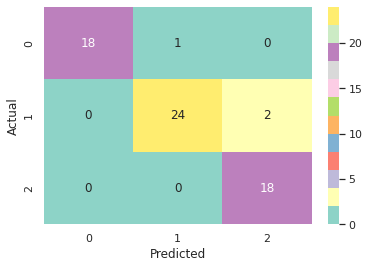

In [61]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Use the trained model to make predictions on the test set
y_pred3 = logRegression.predict(X_test3)

# Generate the confusion matrix
cm = confusion_matrix(y_test3, y_pred3)

# Plot the confusion matrix
sns.heatmap(cm, annot=True, cmap="Set3")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

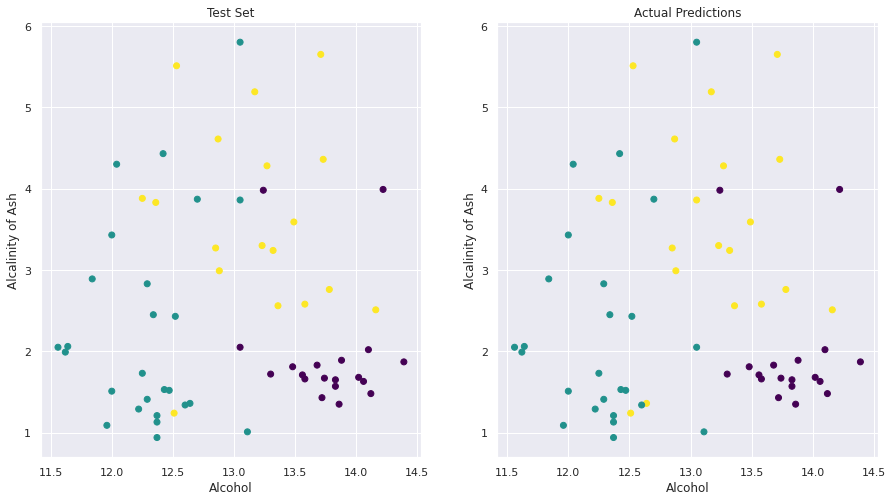

In [62]:
import matplotlib.pyplot as plt

# Create a figure with two subplots side by side
fig, axs3 = plt.subplots(1, 2, figsize=(15, 8))

# Plot the test set on the left subplot
axs3[0].scatter(X_test3[:, 0], X_test3[:, 1], c=y_test3, cmap='viridis')
axs3[0].set_xlabel('Alcohol')
axs3[0].set_ylabel('Alcalinity of Ash')
axs3[0].set_title('Test Set')

# Plot the actual predictions on the right subplot
axs3[1].scatter(X_test3[:, 0], X_test3[:, 1], c=y_pred3, cmap='viridis')
axs3[1].set_xlabel('Alcohol')
axs3[1].set_ylabel('Alcalinity of Ash')
axs3[1].set_title('Actual Predictions')

plt.show()


# Question 16 (20 points) 

a) Do the plot right plot on Question 15 - part 2 match the confusion matrix of part 1?

b) Any interesting observations from the predictions and the model performance? (write at least 2)

a) yes, the plot right plot on Question 15 - part 2 matches the confusion matrix of part 1.

b) 
1. The model has performed well in predicting the class 0 and class 2. It is because the majority of these instances have been predicted correctly. 
2. The model has not performed as well in predicting class 1. We can see this in the confusion matrix as well, where the recall for class 1 is lower than that of class 0 and class 2.

# Question 17 (10 points)

Create AND display dataframe containing in each row the accruacy, precision, recall for each of the models built. 

In the textual answer cell, discuss which one is the best performing model and why?

In [84]:
##### Code block for Question 17

model1=classification_report(y_test, y_pred)
model2=classification_report(y_test2, y_pred2)
model3=classification_report(y_test3, y_pred3)

data = [
    {'Model': 'Model 1', 'Accuracy': 0.48, 'Precision': 0.45, 'Recall': 1.00},
    {'Model': 'Model 2', 'Accuracy': 0.94, 'Precision': 0.92, 'Recall': 0.92},
    {'Model': 'Model 3', 'Accuracy': 0.95, 'Precision': 0.90, 'Recall': 1.00},
]

# create the dataframe from the list of dictionaries
dataFrame = pd.DataFrame(data)

# set the Model column as the index
dataFrame.set_index('Model', inplace=True)

# display the dataframe
print(dataFrame)



         Accuracy  Precision  Recall
Model                               
Model 1      0.48       0.45    1.00
Model 2      0.94       0.92    0.92
Model 3      0.95       0.90    1.00


The model 3 is the best performing model with an accuracy of 0.95. This model had the highest recall, and f1-score for all 2 classes compared to the other two models and slightly lower in precision than model 2 but the precision is just one metric to evaluate the performance of a model. It correctly classified 95% of the instances in the test set.

# Graduate Student Question: (50 points)

Modify the `visualize_classifier` function provided during the 2/20/2023 class to be able to work in 3 dimensions (currently only works in two dimensions). Take the Decision Tree classifier model from Question 8 and plot the separation of the classes using the following axes: (Alcohol as the X axis and Alcalinity of Ash as the Y axis, and Ash as the Z axis).


In [ ]:
##### Code block for Graduate Student Question